This is the first part of the Data analytics on the web assessment, using a colab notebook with an R kernel to complete a review of the dataset and prepare it for further analysis in python.

THis investigation was on the possible relationships between available weather factors and traffic collisions for a specific weather station area in New York City over a period of several years. Weather factors needed to be evaluated for their suitability as predictors, and this was initially completed by determining the quality of the data, before establishing potential relationships.

All initial preparation of the dataset was completed within BigQuery, generating a dataset composed of weather data for the New York Central Park area matched by date with vehicle collision data. This dataset contains 3106 rows of data, each corresponding to a single day within the period of extraction from January 2012-Dec 2020. There were some missing days across this period (the total exprected would be 3288 if all days were included) due to some missing data in the collisions file. These dates corresponded to the first 6 months of 2012, so the data started from July 2012.

The composite dataset was exported as a .csv file then uploaded into GitHub, to which this document links in the initial code. Note that tidyverse R code has been used where possible, so this package is required before data import, as 'read_csv' was used rather than 'read.csv'.



In [1]:
library(tidyverse)
#importing the dataset. This creates month and day variables as character type
collisions <- read_csv("https://raw.githubusercontent.com/16025833UHI/16025833_DataAnalytics/main/Collisions_Assessment.csv")
#Now updating month and day to be factors.
collisions <- collisions %>%
 mutate(across(where(is.character),as.factor))
#then confirming all variables look correct
 head (collisions)
 summary(collisions)

Warning message in system("timedatectl", intern = TRUE):
“running command 'timedatectl' had status 1”
── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.4.0      ✔ purrr   0.3.5 
✔ tibble  3.1.8      ✔ dplyr   1.0.10
✔ tidyr   1.2.1      ✔ stringr 1.4.1 
✔ readr   2.1.3      ✔ forcats 0.5.2 

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Rows: 3106 Columns: 18
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr   (2): mo, da
dbl  (15): day, year, temp, dewp, slp, visib, wdsp, mxpsd, gust, max, min, p...
date  (1): collision_date

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


day,year,mo,da,collision_date,temp,dewp,slp,visib,wdsp,mxpsd,gust,max,min,prcp,sndp,fog,NUM_COLLISIONS
<dbl>,<dbl>,<fct>,<fct>,<date>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
6,2020,01,04,2020-01-04,48.6,46.2,1005.7,4.9,2.8,6,999.9,51.1,44.1,0.34,999.9,1,353
5,2020,01,03,2020-01-03,46.6,38.6,1009.7,8.1,3.7,6,15.0,48.9,33.1,0.06,999.9,1,456
6,2020,01,11,2020-01-11,59.3,48.1,1024.9,10.0,4.8,7,19.0,68.0,51.1,0.00,999.9,0,439
2,2020,01,21,2020-01-21,25.1,5.0,1029.7,10.0,4.1,8,15.0,33.1,19.9,0.00,999.9,0,556
2,2020,01,14,2020-01-14,42.3,36.2,1027.0,7.7,2.9,8,999.9,46.0,37.0,0.00,999.9,1,497
4,2020,01,30,2020-01-30,31.3,14.3,1024.8,10.0,4.2,8,15.0,37.9,25.0,0.00,999.9,0,525


      day             year            mo             da      
 Min.   :1.000   Min.   :2012   07     : 279   01     : 102  
 1st Qu.:2.000   1st Qu.:2014   08     : 279   02     : 102  
 Median :4.000   Median :2016   10     : 279   03     : 102  
 Mean   :3.999   Mean   :2016   12     : 279   04     : 102  
 3rd Qu.:6.000   3rd Qu.:2018   09     : 270   05     : 102  
 Max.   :7.000   Max.   :2020   11     : 270   06     : 102  
                                (Other):1450   (Other):2494  
 collision_date            temp            dewp             slp       
 Min.   :2012-07-01   Min.   : 6.90   Min.   :-16.10   Min.   :  989  
 1st Qu.:2014-08-16   1st Qu.:42.30   1st Qu.: 27.30   1st Qu.: 1012  
 Median :2016-09-30   Median :57.20   Median : 43.40   Median : 1017  
 Mean   :2016-09-30   Mean   :56.15   Mean   : 41.89   Mean   : 1084  
 3rd Qu.:2018-11-15   3rd Qu.:71.97   3rd Qu.: 58.10   3rd Qu.: 1022  
 Max.   :2020-12-31   Max.   :89.10   Max.   : 74.80   Max.   :10000  
       

The import was demonstrated to be successful. The next stage of activity was to evaluate any clear requirements for exclusions. This strategy proceeded by first visualising the dataset to identify any unusual or unexpected patterns. Note that some of the weather variables may have had limited utility at this stage due to high numerical values (such as 999.9) being reported as placeholders for missing data. To remedy this, exclusions or substitutions were considered as options to replace these numerical values. It was not possible to use substitutions such as the median value in some cases, as at least one median value was 999.9. 

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘Rcpp’, ‘plyr’, ‘reshape’


Registered S3 method overwritten by 'GGally':
  method from   
  +.gg   ggplot2



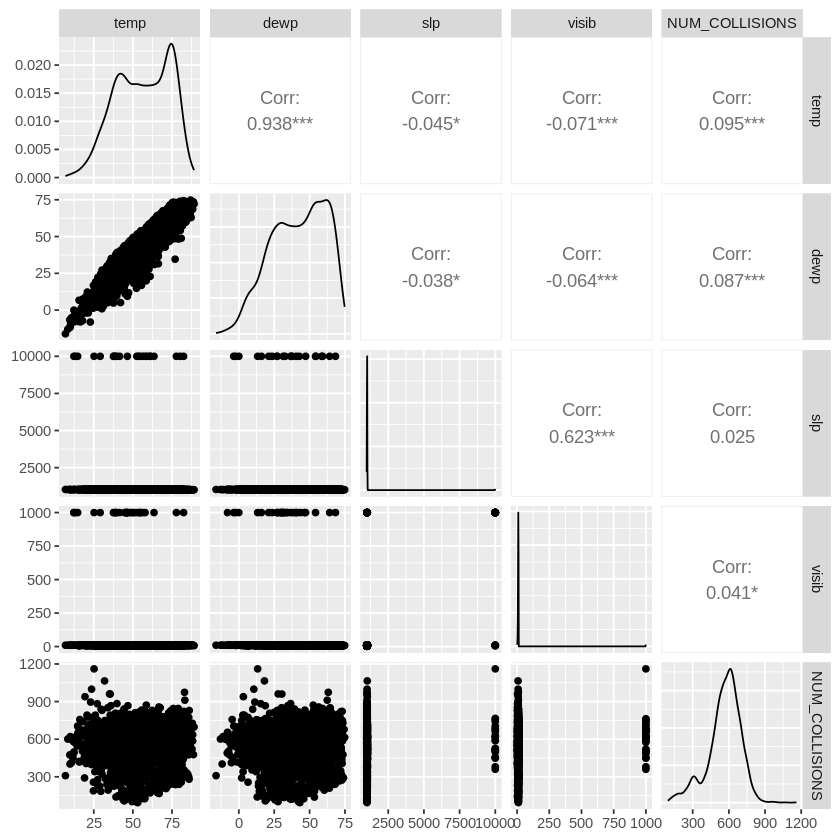

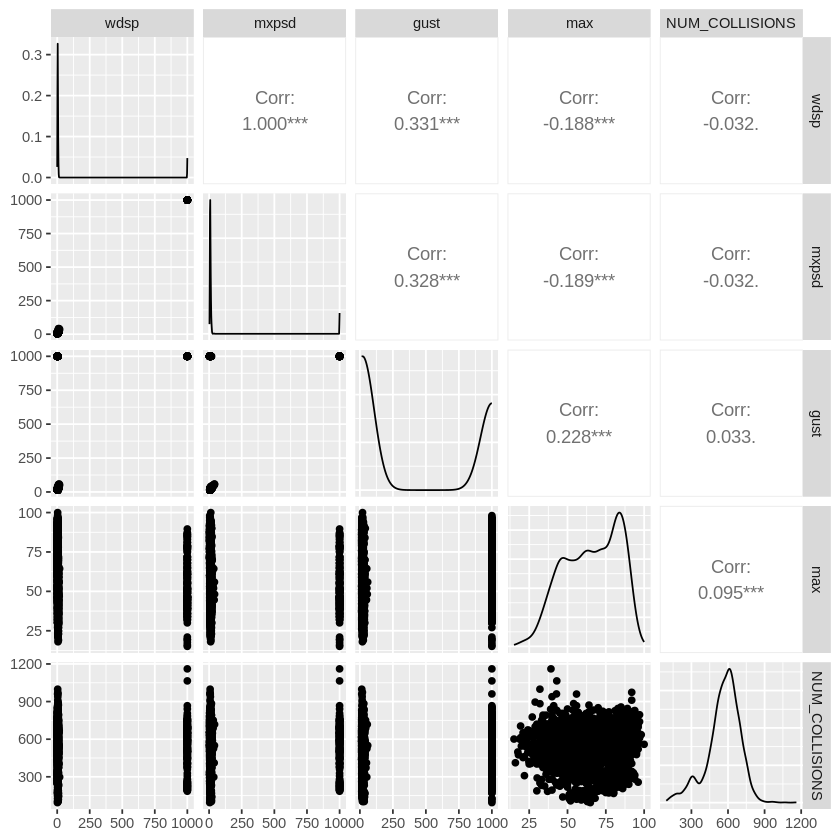

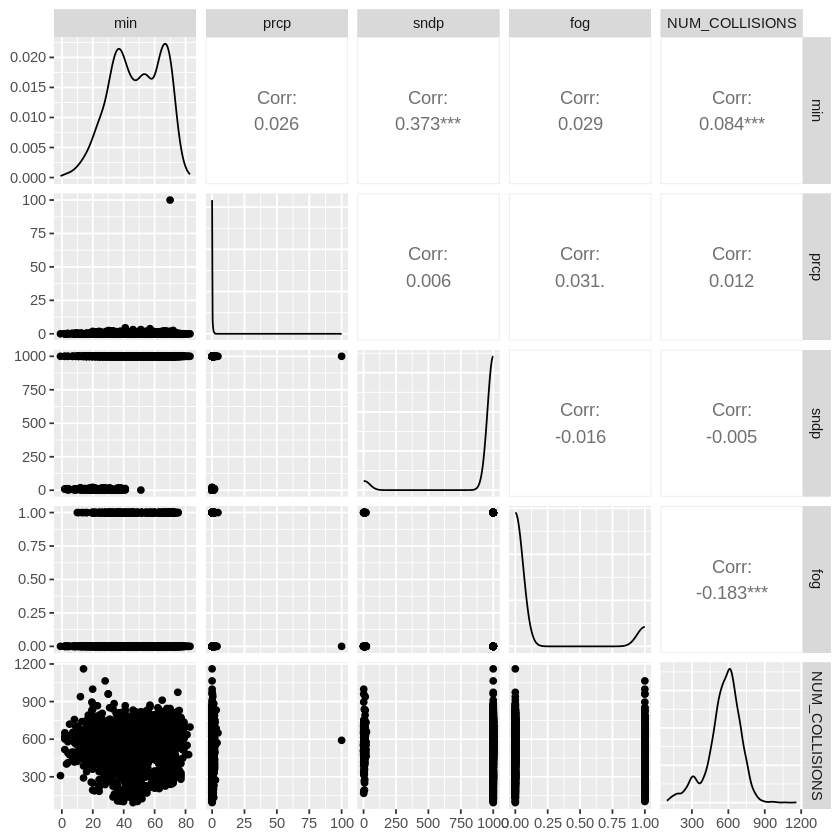

In [2]:
install.packages("GGally")
library (GGally)
# This library is useful as it produces a corellogram with both visual and numerical output.
# However there are too many variables to plot at one time. We are interested in the impact of the input variables on the single output variable.
#for this reason it makes sense to produce a few smaller ones, each with several possible predictors plotted against collisions.
ggpairs(collisions, columns = c(6:9,18))
ggpairs(collisions, columns = c(10:13,18))
ggpairs(collisions, columns = c(14:17,18))

Initial assessment of the dataset was difficult - There was a significant  requirement for data to be tidied before any interpretation was possible. The values 999.9  and 9999.9 were know to have been used as placeholders for missing data, so these either needed to be removed in order to fix some scaling issues, or needed to be set to a default value. These missing data values were often used where "0" was more appropriate, so the method chosen was to set 999.9 and 9999.9 to 0 for a cleaner evaluation. Note that there was a risk of losing a small amount of pressure data by removing 999.9, but this was considered acceptable.


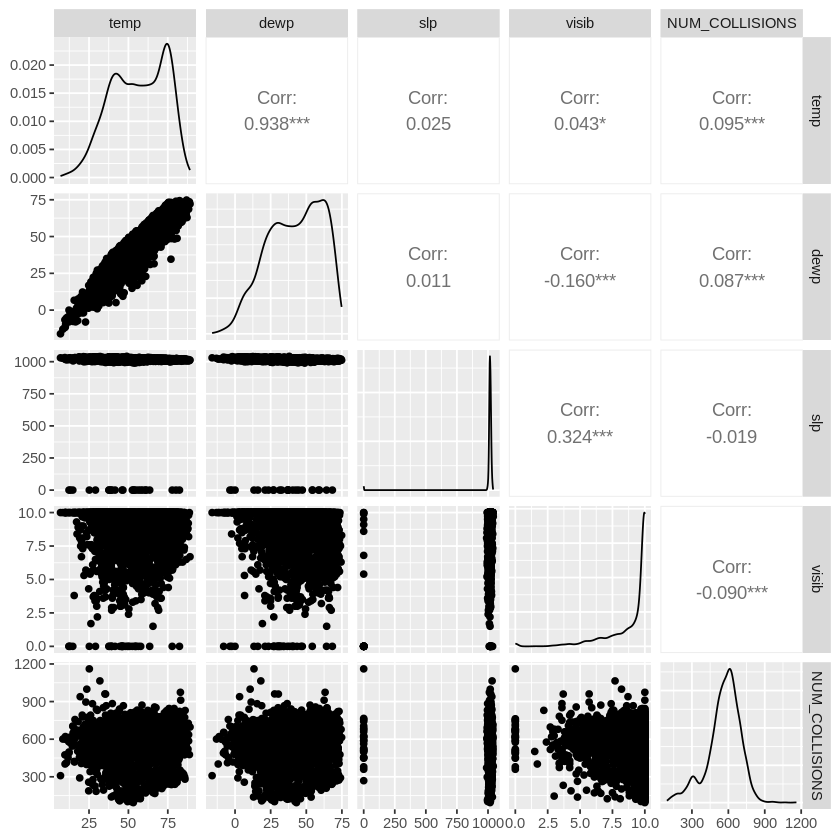

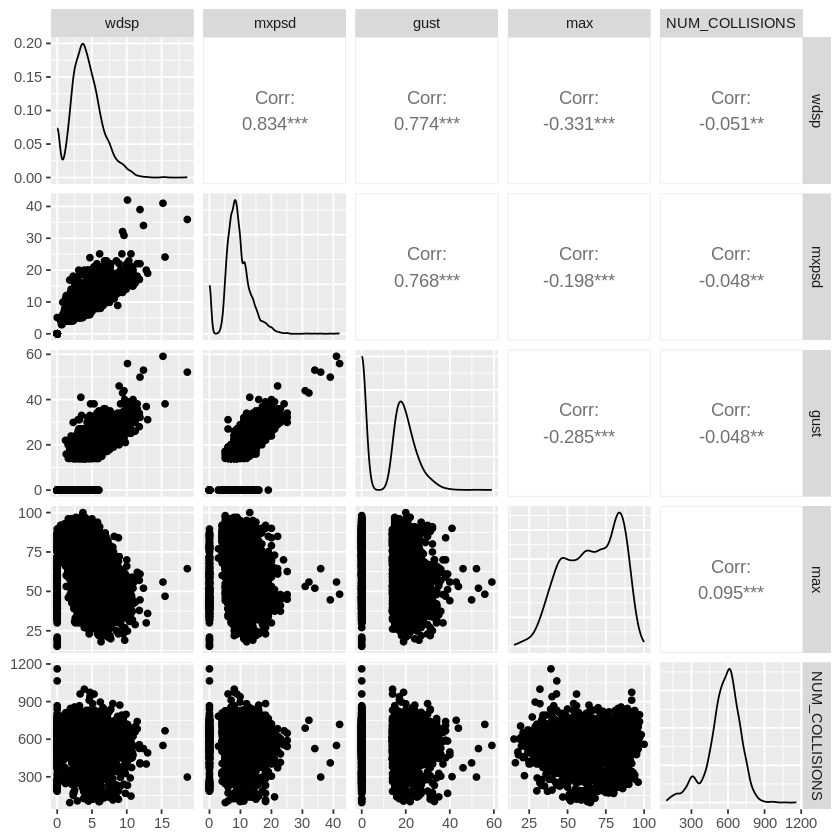

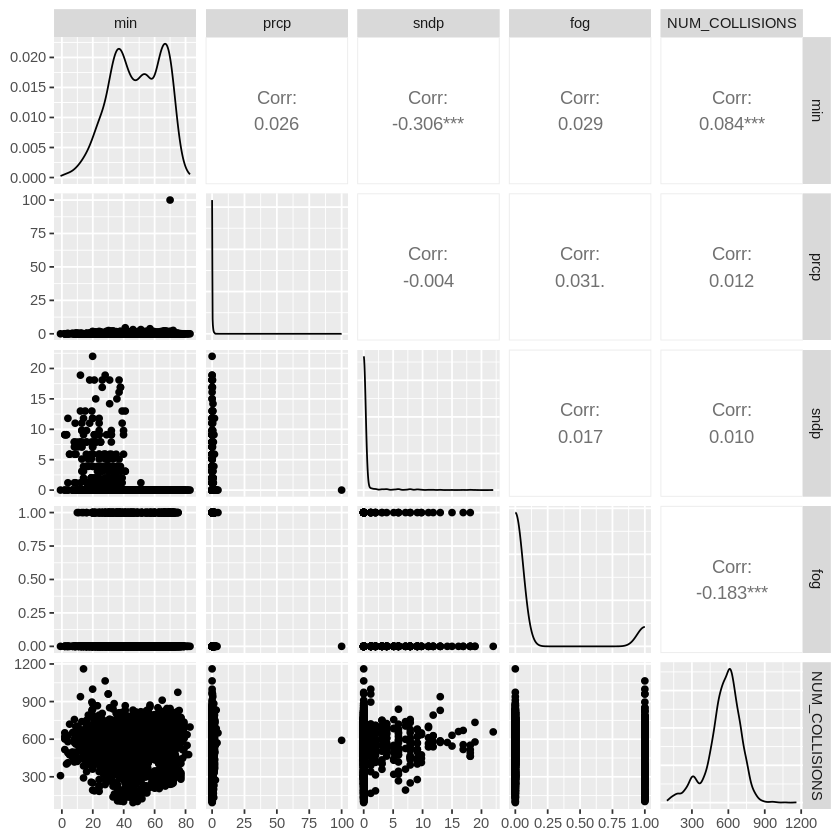

In [3]:
#removing the placeholder values
collisions[collisions == 999.9] <- 0
collisions[collisions == 9999.9] <- 0

ggpairs(collisions, columns = c(6:9,18))
ggpairs(collisions, columns = c(10:13,18))
ggpairs(collisions, columns = c(14:17,18))

There was still more cleaning activity required at this stage, as there were many '0' values that were having a large impact on the dataset, but it was possible to get a clearer read on general performance. From here the individual variables were reviewed and next activities identified:

Temp, dewp, max and min were all related (all are direct temperature measurements except for the dewpoint which is generated using a combination of temperature and relative humidity). To remove any risk of multicollinearity only a single one of these four was used as a predictor variable. These were plotted (see the next code box) to confirm that they all had strong correlations, demonstrating that picking a single variable was the correct approach. Temperature and maximum temperature had the strongest correlation with the number of collisions, so temperature was chosen. 

Wdsp, mxpsd and gust were again all related, with strong correlations with one another. These were already in the same plot above, and the relationship was clear. The correlations with collisions were all weak, but windspeed was strongest by a small margin so this was chosen. 

slp (pressure) still needed to have 0 values removed. By eye there appeared to be only a relatively small number of 0 values, so only a small amount of data had been lost from the previous cleaning step.

visib (visibility) also needed to have 0 values removed before a suitable assessment could be completed.

prcp (precipitation) required a placeholder 99.99 value removed before further evaluation was possible.

sndp (snow depth) looked sensible, including a large number of 0 values where no snow was observed. There was no relationship at this stage with collisions, so this variable was not chosen as a predictor for the final model.

fog - this was a binomial predictor variable, and seemed to have the strongest relationship with collisions. All values were correctly either 0 or 1, so no further processing was required. This was chosen to be included in the linear model.


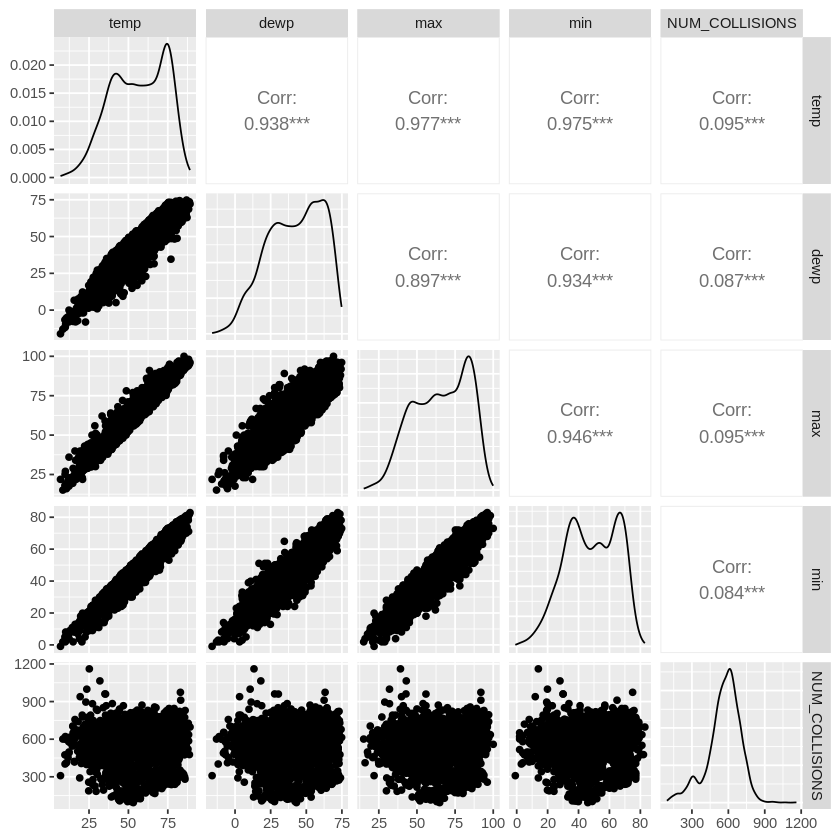


	Shapiro-Wilk normality test

data:  collisions$NUM_COLLISIONS
W = 0.96047, p-value < 2.2e-16


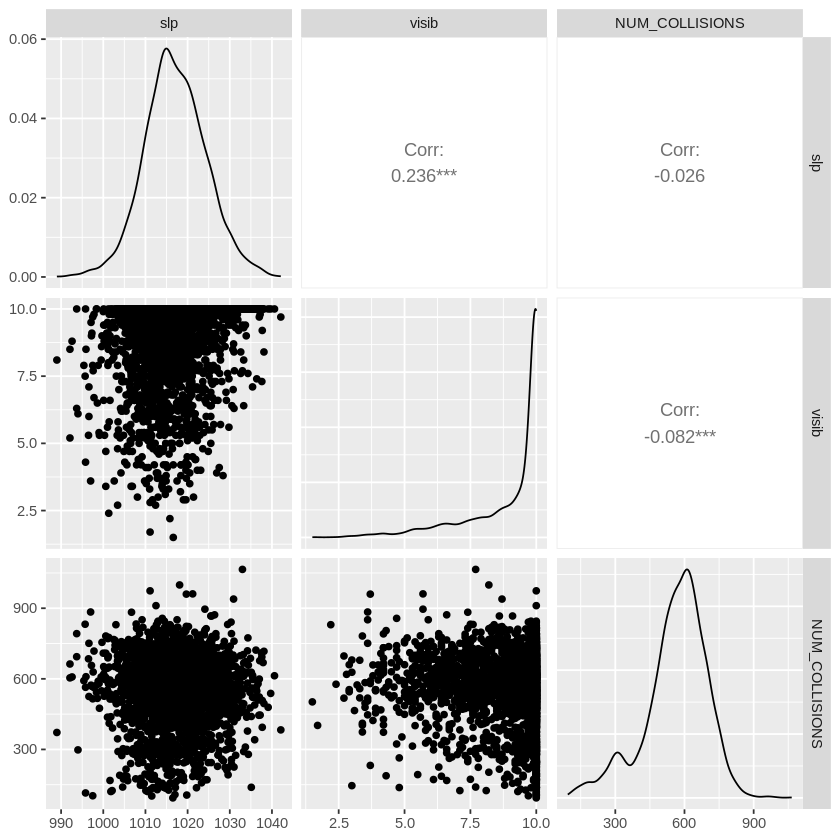

In [4]:
#reviewing relationship of temp, max, min and dewp
ggpairs(collisions, columns = c(6:7,13:14,18))
#replacing precipitation missing 99.99 placeholder with 0
collisions$prcp[collisions$prcp == 99.99] <- 0
#removing 0 values from 'slp' and 'visib'. This gives a dataset with 40 fewer observations. We could go back to collisions and clean slightly differently to retain more data, but for a datset of this size the removal of 40 vaules will not have a large impact.
slp_visib_check <- collisions %>%
  filter(slp > 0 & visib > 0)
#Therefore we update the collisions dataframe
collisions <- slp_visib_check
#now looking at the relationships:
ggpairs(collisions, columns = c(8:9,18))
#this looks at though there's an interesting association between the meteorological variables, but unfortunately only weak relationships between the three variables and collisions. The effect of precipitation and visibility are significant, so we will add these to the model.

#we can also review the normality of the collisions response variable.
shapiro.test(collisions$NUM_COLLISIONS)
#this inidcates non-normality, though from the  distributions within the previous plots this appears to be driven by a slight bimodality, rather than a non-normal model being more appropriate.


From this analysis the predictor variables identified up to this point were: Temp, Wdsp, visib, prcp, fog.

It was also necessary to review the relationship between collisions and the day of the week. This was plotted using colour coding for year to aid in visualisation.

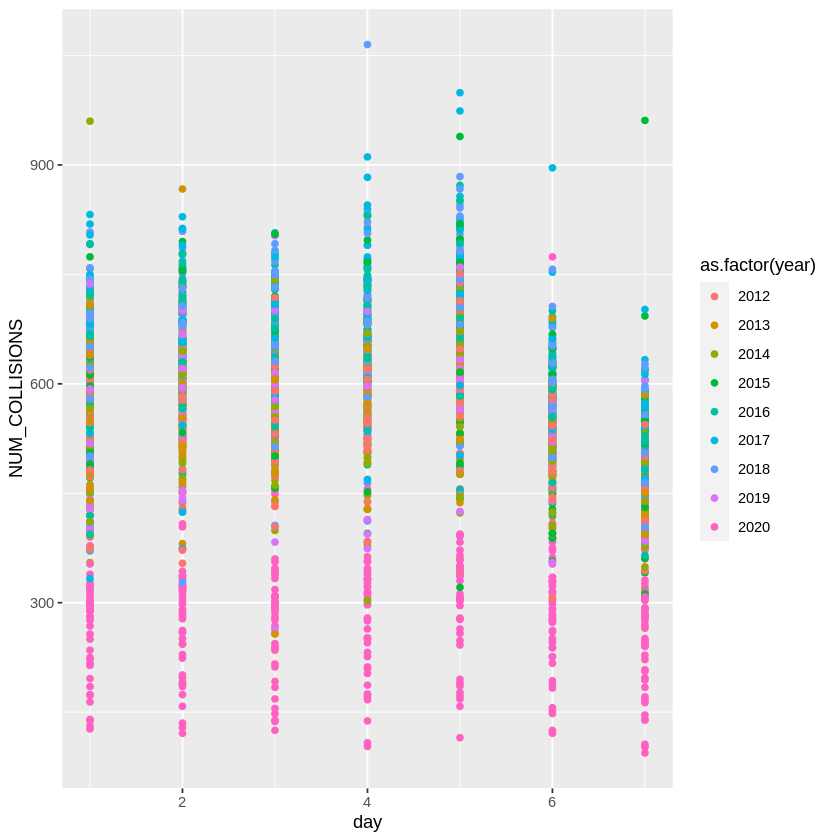

In [5]:
#by plotting using colour for year and converting year to a factor, we can see some large year to year differences.
ggplot(collisions, aes(x=day, y=NUM_COLLISIONS, colour = as.factor(year)) ) +
  geom_point()


 Pandemic year 2020 was clearly an outlier and needed to be addressed. It was  also clear that there were fewer collisions at the weekend, which may well have been because less cars were on the road. In addition, Sunday was lower than Saturday.

The next task was to sort the dataset in date order to prepare for further analysis. Once sorted, a numerical sequence column was added to allow for easy summary plotting and further manipulation.

A summary plot of all data was then produced to allow for the visualisation of patterns over the entire duration of the dataset.



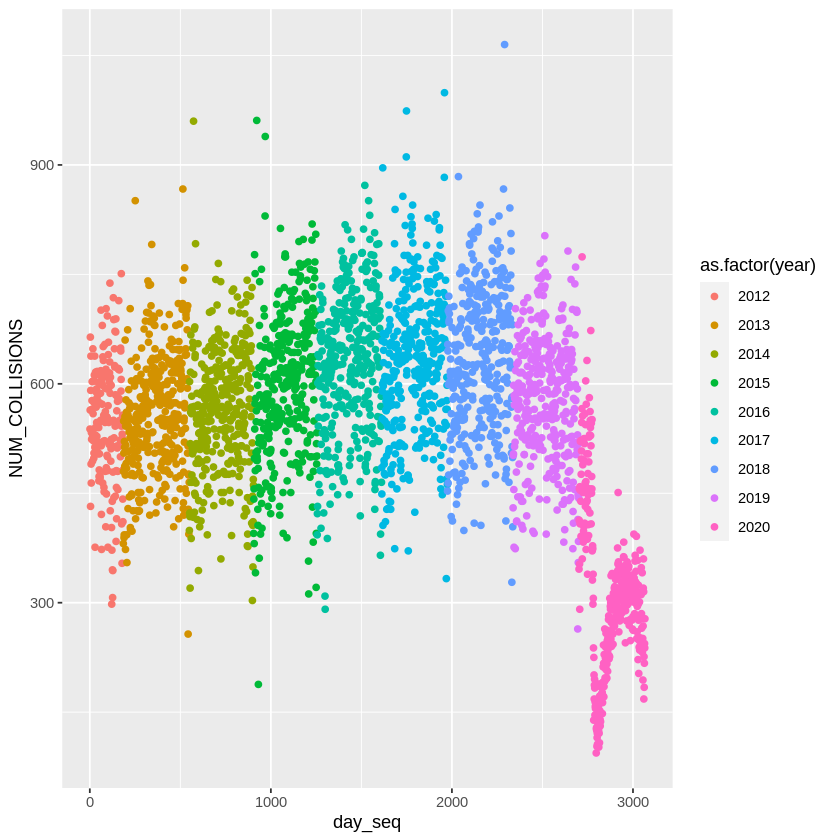

In [6]:
#sort the data
collisions <- arrange(collisions, collision_date)
#code to assign a numerical row identifier
count <- c(1:nrow(collisions))
collisions <- collisions %>%
  mutate(day_seq = count)

#summary plot 
ggplot(collisions, aes(x=day_seq, y=NUM_COLLISIONS, colour = as.factor(year)) ) +
  geom_point()


The patterns observed in the data indicated that 2020 (the year in which covid-19 restrictions started) was highly unrepresentative of the rest of the dataset, and thus ought to be removed. This would help true patterns to more easiliy be distinguished from the remaining years. The final 6 months of 2012 looked similar to other years, so this was retained. A datset was then produced for each year so they could be evaluated individually, because although the patterns are similar, there appears to be a steady overall increase year-on-year from 2012-2018, whilst 2019 is lower.

In [7]:
#removing 2020 data
collisions2 <- collisions %>%
  filter(year!= 2020)

#creating one dataset for each year
col_2012 <- collisions2 %>%
  filter (year == 2012)
col_2013 <- collisions2 %>%
  filter (year == 2013)
col_2014 <- collisions2 %>%
  filter (year == 2014)
col_2015 <- collisions2 %>%
  filter (year == 2015)
col_2016 <- collisions2 %>%
  filter (year == 2016)
col_2017 <- collisions2 %>%
  filter (year == 2017)
col_2018 <- collisions2 %>%
  filter (year == 2018)
col_2019 <- collisions2 %>%
  filter (year == 2019)

From here the days of the week were revisited to look at the pattern without as much year-to-year noise.Two sample years were chosen.

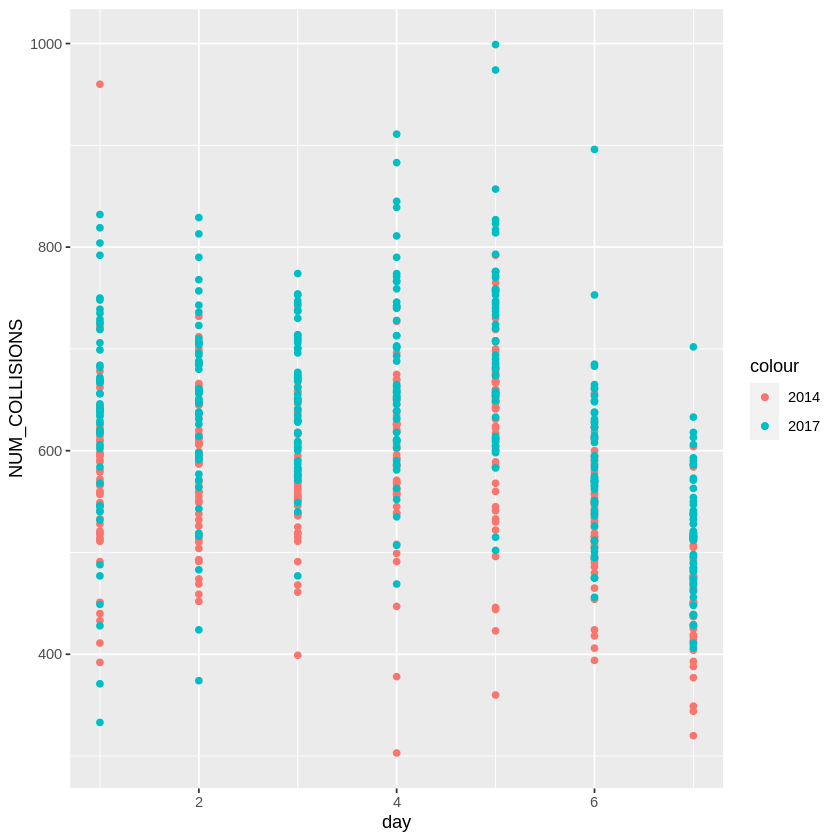

In [8]:
ggplot() +
  geom_point(data=col_2014, aes(x=day, y=NUM_COLLISIONS, colour = "2014"))+
  geom_point(data=col_2017, aes(x=day, y=NUM_COLLISIONS,colour = "2017"))

These still indicated that Saturday was lower and Sunday was the lowest, so the sequence of days needed to be altered to assist in examaining the strength of the relationship. Before this, there were two further steps required to remove outliers and standardise data across years. To remove outliers, each year was reviewed and limits applied according to the mean and SD. Specifically, values outside 3*SD from the mean were excluded. This involved some risk, and an example histogram of one year (2014) is presented below, showing a left skew, indicating non-normal data. However, the SD values were relatively large, and this limited the number of exclusions. The means and medians were also similar.  A year-specific count of days was also added during the process to make year-to-year comparisons easier to plot.

year,min,max,mean,median,SD,min_cut,max_cut
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2012,298,751,546.4402,548.5,84.73712,292.2289,800.6516
2013,257,867,558.1753,558.0,83.27392,308.3536,807.9971
2014,303,960,564.1352,568.0,86.90419,303.4227,824.8478
2015,188,961,596.1481,600.0,103.58188,285.4025,906.8938
2016,291,872,627.3090,635.0,97.77125,333.9952,920.6227
2017,333,999,632.7500,635.5,102.44211,325.4237,940.0763
2018,328,1065,633.7017,632.5,99.93122,333.9080,933.4953
2019,264,803,579.7527,589.0,88.83302,313.2537,846.2518


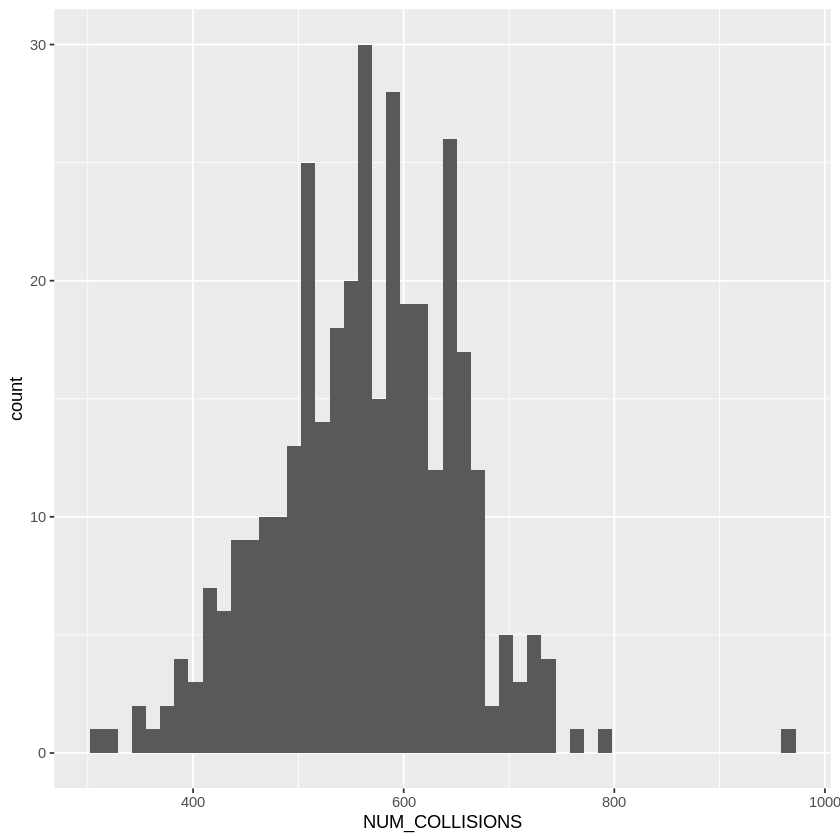

In [9]:
#visualising a sample year (2014)
ggplot(filter(collisions, year == 2014), aes(x=NUM_COLLISIONS)) +
  geom_histogram(bins=50)

#summarising the statistics for assigning threshold cutoffs for each year
stats_summary <- collisions2 %>%
  group_by(year) %>%
  summarise (min = min(NUM_COLLISIONS), max = max(NUM_COLLISIONS), mean = mean(NUM_COLLISIONS),
             median = median(NUM_COLLISIONS), SD =sd(NUM_COLLISIONS))
#adding cutoffs based on 3*SD
stats_summary <- stats_summary %>%
  rowwise() %>%
  mutate(min_cut = mean-(3*SD), max_cut = mean+(3*SD))
#displaying output
stats_summary
#now excluding large outliers by year and adding 
col_2012 <- left_join(col_2012, stats_summary, by='year')
col_2012 <- col_2012 %>%
  filter(NUM_COLLISIONS > min_cut & NUM_COLLISIONS < max_cut) %>%
  select(-c(min.y:max_cut)) #this removes the excess columns added by the join
col_2012 <- col_2012 %>% #this adds a day of the year column. Could not be piped.
  mutate(day_yr = 1:nrow(col_2012))

col_2013 <- left_join(col_2013, stats_summary, by='year')
col_2013 <- col_2013 %>%
  filter(NUM_COLLISIONS > min_cut & NUM_COLLISIONS < max_cut) %>%
  select(-c(min.y:max_cut))
col_2013 <- col_2013 %>%
  mutate(day_yr = 1:nrow(col_2013))

col_2014 <- left_join(col_2014, stats_summary, by='year')
col_2014 <- col_2014 %>%
  filter(NUM_COLLISIONS > min_cut & NUM_COLLISIONS < max_cut) %>%
  select(-c(min.y:max_cut))
col_2014 <- col_2014 %>%
  mutate(day_yr = 1:nrow(col_2014))

col_2015 <- left_join(col_2015, stats_summary, by='year')
col_2015 <- col_2015 %>%
  filter(NUM_COLLISIONS > min_cut & NUM_COLLISIONS < max_cut) %>%
  select(-c(min.y:max_cut))
col_2015 <- col_2015 %>%
  mutate(day_yr = 1:nrow(col_2015))

col_2016 <- left_join(col_2016, stats_summary, by='year')
col_2016 <- col_2016 %>%
  filter(NUM_COLLISIONS > min_cut & NUM_COLLISIONS < max_cut) %>%
  select(-c(min.y:max_cut))
col_2016 <- col_2016 %>%
  mutate(day_yr = 1:nrow(col_2016))

col_2017 <- left_join(col_2017, stats_summary, by='year')
col_2017 <- col_2017 %>%
  filter(NUM_COLLISIONS > min_cut & NUM_COLLISIONS < max_cut) %>%
  select(-c(min.y:max_cut))
col_2017 <- col_2017 %>%
  mutate(day_yr = 1:nrow(col_2017))

col_2018 <- left_join(col_2018, stats_summary, by='year')
col_2018 <- col_2018 %>%
  filter(NUM_COLLISIONS > min_cut & NUM_COLLISIONS < max_cut) %>%
  select(-c(min.y:max_cut))
col_2018 <- col_2018 %>%
  mutate(day_yr = 1:nrow(col_2018))

col_2019 <- left_join(col_2019, stats_summary, by='year')
col_2019 <- col_2019 %>%
  filter(NUM_COLLISIONS > min_cut & NUM_COLLISIONS < max_cut) %>%
  select(-c(min.y:max_cut))
col_2019 <- col_2019 %>%
  mutate(day_yr = 1:nrow(col_2019))

The new mean values were then required as an input to standardise the data, using (𝑥 − 𝜇)/𝜎. This effectively meant repeating the previous step. In theory this could have been done as part of the previous step, however this was split into two separate steps to illustrate the sequence of activities. The data was plotted after this in total time sequence and time sequence withing the year to demonstrate that the standardisation has worked, then further plots were created to evaluate normality and verify that the original relationships for the weather factors were still valid. Before standardisation there was a final check of the overall mean, SD and median of the number of collisions in order to create a multiplication value after using the regressors. The mean of 595 and SD of 96.4 were used for this purpose. This posed little risk from a non-normality persepctive, aas the median (598) was very close to the mean .

      day         year            mo             da       collision_date      
 Min.   :1   Min.   :2012   07     : 248   12     :  90   Min.   :2012-07-01  
 1st Qu.:2   1st Qu.:2014   08     : 245   01     :  89   1st Qu.:2014-05-17  
 Median :4   Median :2016   10     : 245   02     :  89   Median :2016-04-08  
 Mean   :4   Mean   :2016   09     : 240   04     :  89   Mean   :2016-04-02  
 3rd Qu.:6   3rd Qu.:2018   11     : 235   05     :  89   3rd Qu.:2018-02-20  
 Max.   :7   Max.   :2019   12     : 232   09     :  89   Max.   :2019-12-31  
                            (Other):1241   (Other):2151                       
      temp           dewp             slp           visib       
 Min.   : 8.4   Min.   :-13.00   Min.   : 989   Min.   : 1.500  
 1st Qu.:42.2   1st Qu.: 27.20   1st Qu.:1012   1st Qu.: 8.500  
 Median :57.8   Median : 44.10   Median :1017   Median : 9.800  
 Mean   :56.3   Mean   : 41.98   Mean   :1017   Mean   : 8.962  
 3rd Qu.:72.1   3rd Qu.: 58.10   3rd Qu.:10

[1] 96.39912

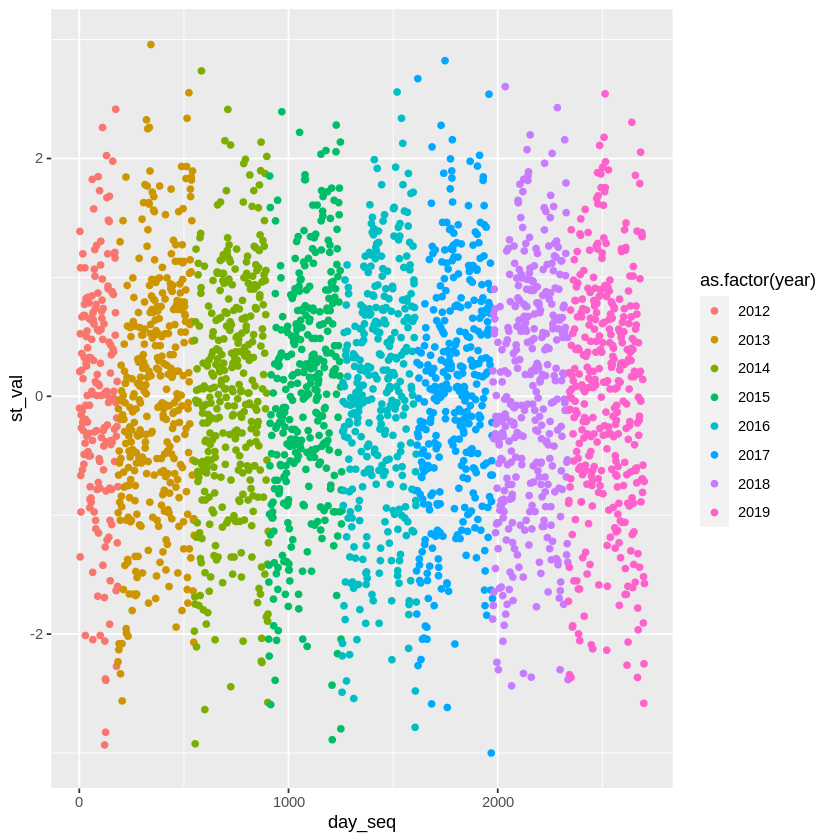

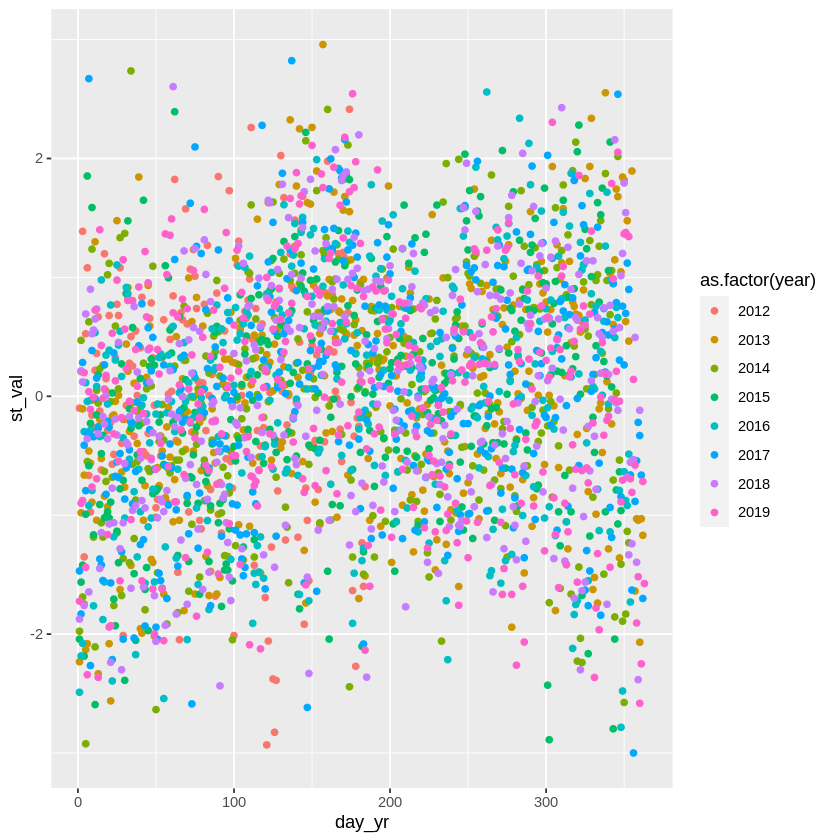

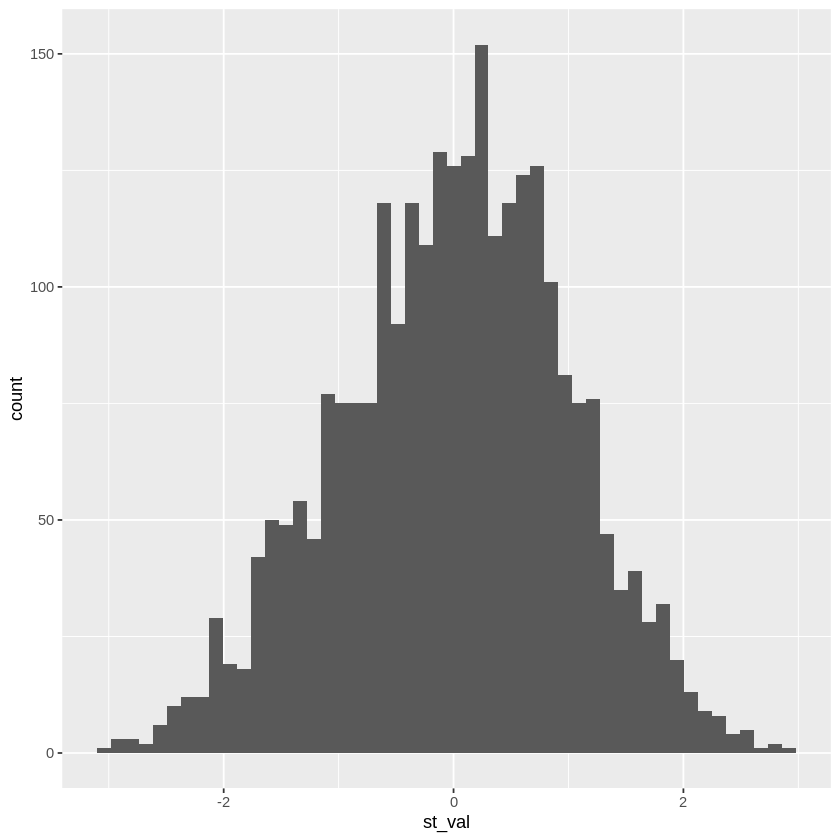

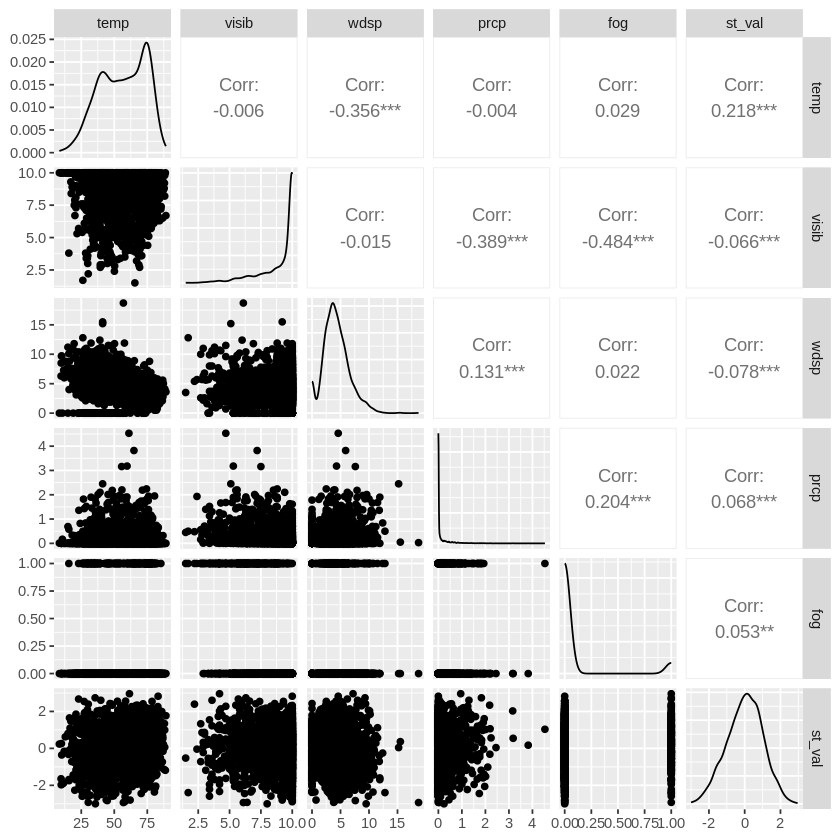

In [10]:
#step 2 for standardization

#creating a full dataset again
col_clean <- bind_rows(col_2012, col_2013,col_2014,col_2015,col_2016,col_2017,col_2018,col_2019)

#summary stats (indicative for later use with the regressors)
summary(col_clean)
sd(col_clean$NUM_COLLISIONS)

#now adding a summary table
stats_summary2 <- col_clean %>%
  group_by(year) %>%
  summarise (mean = mean(NUM_COLLISIONS),SD = sd(NUM_COLLISIONS))

#joining the stats onto the table
col_clean2 <- left_join(col_clean, stats_summary2, by='year')

#adding the standardisation function
col_clean2 <- col_clean2 %>%
    mutate(st_val = (NUM_COLLISIONS-mean)/SD)

#check that standardisation has worked.
#First visualising using the original time sequence
  ggplot(col_clean2, aes(x=day_seq, y=st_val, colour = as.factor(year)) ) +
  geom_point()

#Then visualising using the day of year sequence
ggplot(col_clean2, aes(x=day_yr, y=st_val, colour = as.factor(year)) ) +
  geom_point()

#Reviewing the distribution again
ggplot(col_clean2, aes(x=st_val)) +
  geom_histogram(bins=50)

#returning to the original predictor variables to re-evaluate
ggpairs(col_clean2, columns = c(6,9,10,15,17,23))



The plots indicated that the standardisation was successful, creating a normal-looking distribution. All factors originally identifed were still significant, and so were retained. This also indicated that it was possible to return to the days of the week to alter the sequence for the purpose of evaluating a relationship. This was performed by temporarily altering the numerical identifiers for the weekdays.

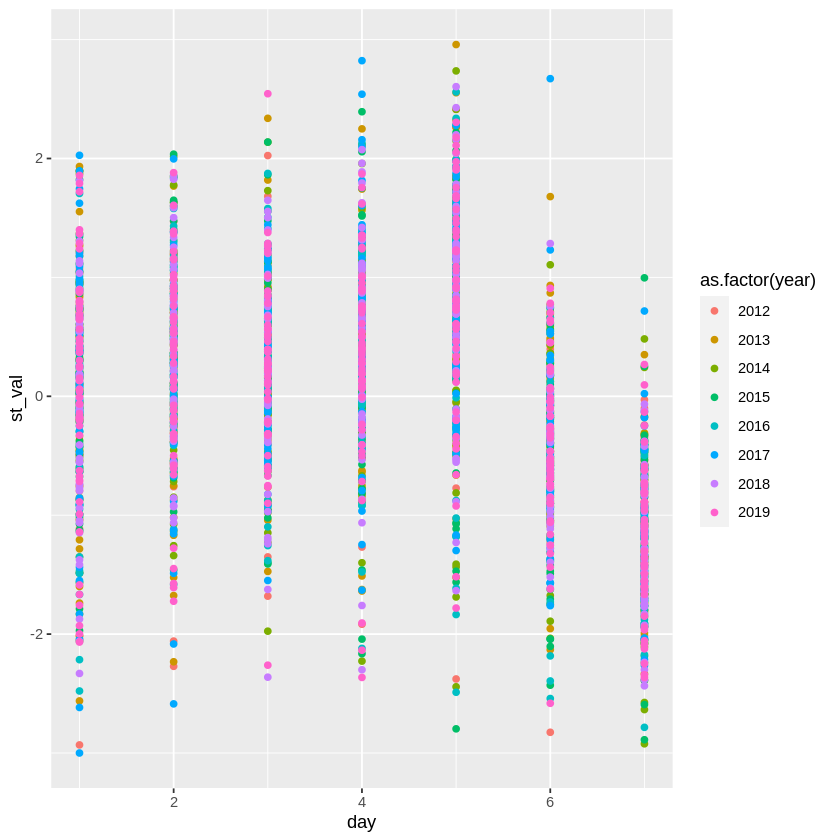

[1] 0.5440019


Call:
lm(formula = st_val ~ day_recode, data = col_clean2)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.6136 -0.5045  0.0322  0.5360  3.2128 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) -1.084469   0.036111  -30.03   <2e-16 ***
day_recode   0.271623   0.008087   33.59   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.8381 on 2684 degrees of freedom
Multiple R-squared:  0.2959,	Adjusted R-squared:  0.2957 
F-statistic:  1128 on 1 and 2684 DF,  p-value: < 2.2e-16


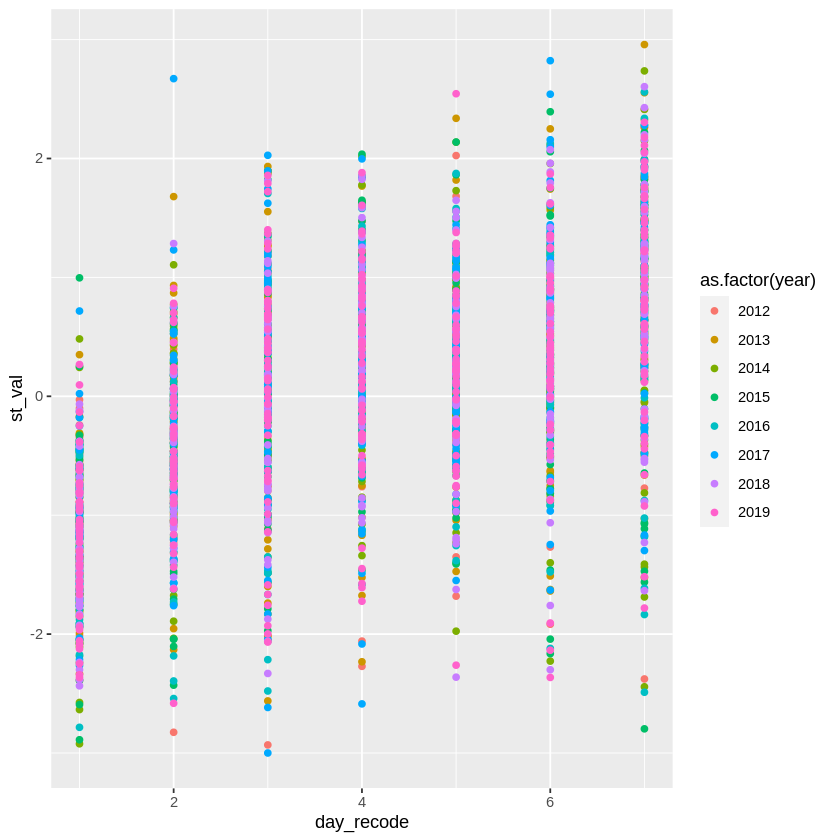

In [11]:
#re-evaluating days of the week again
ggplot(col_clean2, aes(x=day, y=st_val, colour = as.factor(year)) ) +
  geom_point()

#now creating new day name column
col_clean2 <- col_clean2 %>%
  mutate(day_name = day, .after = day)

#adding day names

col_clean2$day_name[col_clean2$day_name == 1] <- 'Mon'
col_clean2$day_name[col_clean2$day_name == 2] <- 'Tue'
col_clean2$day_name[col_clean2$day_name == 3] <- 'Wed'
col_clean2$day_name[col_clean2$day_name == 4] <- 'Thu'
col_clean2$day_name[col_clean2$day_name == 5] <- 'Fri'
col_clean2$day_name[col_clean2$day_name == 6] <- 'Sat'
col_clean2$day_name[col_clean2$day_name == 7] <- 'Sun'

#adding recoded values to evaluate the linear relationship

col_clean2 <- col_clean2 %>%
  mutate(day_recode = day, .after = day_name)

#this means that Sunday is now 1 and Saturday is 2:

col_clean2$day_recode <- col_clean2$day_recode+2
col_clean2$day_recode[col_clean2$day_recode == 9] <- 1
col_clean2$day_recode[col_clean2$day_recode == 8] <- 2

#revisualise to ensure correct order
ggplot(col_clean2, aes(x=day_recode, y=st_val, colour = as.factor(year)) ) +
  geom_point()

#now check the relationship

#first correlation
cor(col_clean2$day_recode, col_clean2$st_val)

#then simple linear model for R-squared
day_model <- lm(st_val ~ day_recode,data = col_clean2)
summary(day_model)

This successfully demonstrated that the day of the week was a significant predictor of the number of collisons, explaining approximately 30% of the variation in the collision data. This was also added to the linear model. At this stage all variables for future analysis had been determined, and the final preparation step was to adjust the data format for one-hot encoding. The first part of this was to create a column of month names, as the day names had been created in a previous step. After this the one-hot matrices were created to translate the categorical variables into numerical values. The final data frame was then composed of the constiuent parts, and the columns named for clarity.

In [12]:
#adding month names column. Note that this is changed to character from factor
#to prevent errors from occuring.

col_clean2 <- col_clean2 %>%
mutate(mo1 = as.character(mo), .after = mo)


#changing names to text

col_clean2$mo1[col_clean2$mo1 == 1] <- 'Jan'
col_clean2$mo1[col_clean2$mo1 == 2] <- 'Feb'
col_clean2$mo1[col_clean2$mo1 == 3] <- 'Mar'
col_clean2$mo1[col_clean2$mo1 == 4] <- 'Apr'
col_clean2$mo1[col_clean2$mo1 == 5] <- 'May'
col_clean2$mo1[col_clean2$mo1 == 6] <- 'Jun'
col_clean2$mo1[col_clean2$mo1 == 7] <- 'Jul'
col_clean2$mo1[col_clean2$mo1 == 8] <- 'Aug'
col_clean2$mo1[col_clean2$mo1 == 9] <- 'Sep'
col_clean2$mo1[col_clean2$mo1 == 10] <- 'Oct'
col_clean2$mo1[col_clean2$mo1 == 11] <- 'Nov'
col_clean2$mo1[col_clean2$mo1 == 12] <- 'Dec'

#final check of data structure
head(col_clean2)

months <- model.matrix(~0+col_clean2$mo1)
colnames(months) <- c("Apr", "Aug", "Dec", "Feb", "Jan", "Jul", "Jun", "Mar", "May", "Nov", "Oct", "Sep")
head(months)

#creating matrices as part of the final dataframe for months and days

daysofweek <- model.matrix(~0+col_clean2$day_name)
colnames(daysofweek) <- c("Fri", "Mon", "Sat", "Sun", "Thu", "Tue", "Wed")
head(daysofweek)

#composing final data frame
final_col_DF <- data.frame(months, daysofweek, col_clean2$year,col_clean2$day_recode, col_clean2$temp,col_clean2$visib, col_clean2$wdsp, col_clean2$prcp,col_clean2$fog,col_clean2$st_val) %>%
rename("year" = "col_clean2.year", "day" = "col_clean2.day_recode", "temp" = "col_clean2.temp", "visib" = "col_clean2.visib", "wdsp" = "col_clean2.wdsp", "prcp" = "col_clean2.prcp",
       "fog" = "col_clean2.fog", "collisions" = "col_clean2.st_val")

day,day_name,day_recode,year,mo,mo1,da,collision_date,temp,dewp,⋯,min.x,prcp,sndp,fog,NUM_COLLISIONS,day_seq,day_yr,mean,SD,st_val
<dbl>,<chr>,<dbl>,<dbl>,<fct>,<chr>,<fct>,<date>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<dbl>,<dbl>,<dbl>
7,Sun,1,2012,07,07,01,2012-07-01,83.6,63.0,⋯,66.0,0.00,0,0,538,1,1,546.4402,84.73712,-0.09960473
1,Mon,3,2012,07,07,02,2012-07-02,80.3,54.1,⋯,66.9,0.00,0,0,564,2,2,546.4402,84.73712,0.20722658
2,Tue,4,2012,07,07,03,2012-07-03,79.8,56.7,⋯,63.0,0.00,0,0,664,3,3,546.4402,84.73712,1.38734698
3,Wed,5,2012,07,07,04,2012-07-04,81.8,65.6,⋯,68.0,0.06,0,0,432,4,4,546.4402,84.73712,-1.35053235
4,Thu,6,2012,07,07,05,2012-07-05,86.7,64.3,⋯,70.0,0.00,0,0,591,5,5,546.4402,84.73712,0.52585909
5,Fri,7,2012,07,07,06,2012-07-06,81.9,62.3,⋯,66.9,0.00,0,0,638,6,6,546.4402,84.73712,1.08051567


,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
1,0,0,0,0,0,0,1,0,0,0,0,0
2,0,0,0,0,0,0,1,0,0,0,0,0
3,0,0,0,0,0,0,1,0,0,0,0,0
4,0,0,0,0,0,0,1,0,0,0,0,0
5,0,0,0,0,0,0,1,0,0,0,0,0
6,0,0,0,0,0,0,1,0,0,0,0,0


,Fri,Mon,Sat,Sun,Thu,Tue,Wed
1,0,0,0,1,0,0,0
2,0,1,0,0,0,0,0
3,0,0,0,0,0,1,0
4,0,0,0,0,0,0,1
5,0,0,0,0,1,0,0
6,1,0,0,0,0,0,0


This completed all work required for the next stage of the data evaluation using python. This document comprises both the introduction and methods section, but there is a small amount of additional methodology detailed in the python document, together with the results and conclusion of the evaluation. The next section of code was used to export the data file.

In [13]:
getwd()
write.csv(final_col_DF, file ="final_col_DF.csv")

[1] "/content"

References:

The packages used for data processing in this section of the report were tidyverse and GGally. The references for these (together with a citation for R) are as follows, in order of use:

R Core Team. 2021. R: A Language and Environment for Statistical Computing. Vienna, Austria: R Foundation for Statistical Computing. https://www.R-project.org/.

Wickham, Hadley, Mara Averick, Jennifer Bryan, Winston Chang, Lucy D’Agostino McGowan, Romain François, Garrett Grolemund, et al. 2019. “Welcome to the tidyverse.” Journal of Open Source Software 4 (43): 1686. https://doi.org/10.21105/joss.01686.

Schloerke, Barret, Di Cook, Joseph Larmarange, Francois Briatte, Moritz Marbach, Edwin Thoen, Amos Elberg, and Jason Crowley. 2021. GGally: Extension to ’Ggplot2’. https://CRAN.R-project.org/package=GGally.


